Machine Learning in Python: Making Receiver Operating Characteristic (ROC) curve
Chanin Nantasenamat

Data Professor YouTube channel, http://youtube.com/dataprofessor

In this Jupyter notebook, we will be making a Receiver Operating Characteristic (ROC) curve using the Iris data set as an example.

What is ROC curve?
The ROC curve summarizes the prediction performance of a classification model at all classification thresholds. Particularly, the ROC curve plots the False Positive Rate (FPR) on the X-axis and the True Positive Rate (TPR) on the Y-axis.

$\text{TPR (Sensitivity)} = \frac{TP}{TP + FN}$

$\text{FPR (1 - Specificity)} = \frac{FP}{TN + FP}$

In [1]:
from sklearn.datasets import make_classification

import numpy as np

In [2]:
X, Y = make_classification(n_samples=2000, n_classes=2, n_features=5, random_state=0)

In [3]:
X

array([[-1.65181704,  0.72598217, -0.05103349, -1.38955644, -2.34958031],
       [ 0.79876162, -0.18839629, -0.02201065,  1.09176925,  1.32166112],
       [ 1.9103425 , -0.56942729,  0.12837594, -0.74242851,  0.058785  ],
       ...,
       [ 0.48657835, -0.17275536,  0.07187685, -0.9082025 , -0.6471559 ],
       [ 0.79574082, -0.18714302,  0.07528536, -0.93038028, -0.64899954],
       [-2.12924567,  0.55880199, -0.02859578, -1.29118829, -2.02430498]])

In [4]:
X.shape, Y.shape

((2000, 5), (2000,))

In [5]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [6]:
type(X)

numpy.ndarray

In [7]:
X.shape

(2000, 1005)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2,
                                                    random_state=0)

In [10]:
X_train.shape

(1600, 1005)

In [11]:
len(Y_train)

1600

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [13]:
dt=DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [14]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

In [15]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [16]:
len(Y_test)

400

In [17]:
r_probs = [0 for _ in range(len(Y_test))]
dt_prob = dt.predict_proba(X_test)
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)

In [18]:
rf_probs[:,1]

array([0.554, 0.496, 0.624, 0.462, 0.428, 0.484, 0.55 , 0.49 , 0.474,
       0.572, 0.47 , 0.532, 0.54 , 0.556, 0.502, 0.594, 0.502, 0.602,
       0.442, 0.44 , 0.542, 0.6  , 0.486, 0.494, 0.606, 0.562, 0.476,
       0.496, 0.456, 0.544, 0.44 , 0.46 , 0.536, 0.564, 0.522, 0.586,
       0.432, 0.542, 0.506, 0.516, 0.508, 0.516, 0.55 , 0.54 , 0.578,
       0.568, 0.464, 0.43 , 0.476, 0.608, 0.504, 0.446, 0.526, 0.532,
       0.46 , 0.614, 0.458, 0.428, 0.46 , 0.578, 0.588, 0.514, 0.47 ,
       0.484, 0.554, 0.43 , 0.582, 0.576, 0.508, 0.472, 0.486, 0.558,
       0.584, 0.482, 0.462, 0.588, 0.464, 0.57 , 0.484, 0.57 , 0.44 ,
       0.592, 0.59 , 0.528, 0.474, 0.554, 0.57 , 0.574, 0.46 , 0.498,
       0.482, 0.476, 0.45 , 0.594, 0.512, 0.446, 0.534, 0.524, 0.452,
       0.554, 0.554, 0.566, 0.428, 0.574, 0.472, 0.462, 0.476, 0.468,
       0.514, 0.544, 0.456, 0.512, 0.464, 0.456, 0.442, 0.404, 0.496,
       0.52 , 0.444, 0.492, 0.392, 0.452, 0.476, 0.534, 0.504, 0.456,
       0.458, 0.478,

In [19]:
dt_prob

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [20]:
rf_probs

array([[0.446, 0.554],
       [0.504, 0.496],
       [0.376, 0.624],
       [0.538, 0.462],
       [0.572, 0.428],
       [0.516, 0.484],
       [0.45 , 0.55 ],
       [0.51 , 0.49 ],
       [0.526, 0.474],
       [0.428, 0.572],
       [0.53 , 0.47 ],
       [0.468, 0.532],
       [0.46 , 0.54 ],
       [0.444, 0.556],
       [0.498, 0.502],
       [0.406, 0.594],
       [0.498, 0.502],
       [0.398, 0.602],
       [0.558, 0.442],
       [0.56 , 0.44 ],
       [0.458, 0.542],
       [0.4  , 0.6  ],
       [0.514, 0.486],
       [0.506, 0.494],
       [0.394, 0.606],
       [0.438, 0.562],
       [0.524, 0.476],
       [0.504, 0.496],
       [0.544, 0.456],
       [0.456, 0.544],
       [0.56 , 0.44 ],
       [0.54 , 0.46 ],
       [0.464, 0.536],
       [0.436, 0.564],
       [0.478, 0.522],
       [0.414, 0.586],
       [0.568, 0.432],
       [0.458, 0.542],
       [0.494, 0.506],
       [0.484, 0.516],
       [0.492, 0.508],
       [0.484, 0.516],
       [0.45 , 0.55 ],
       [0.4

In [21]:
{"Y_test":Y_test,
             "Random PRED": r_probs,
             "DT_PROBS":dt_prob.reshape(1,-1),
             "RF_PROBS": rf_probs.reshape(1,-1),
             "nb_probs":nb_probs}

{'Y_test': array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
        0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
        0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 1,

In [22]:
dt_probs.shape,rf_probs.shape,  nb_probs.shape

NameError: ignored

In [23]:
dt_probs = dt_prob[:, 1]
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

In [24]:
import pandas as pd
df_prob = pd.DataFrame({"Y_test":Y_test,
             "Random PRED": r_probs,
            "DT_PROBS":dt_probs,
             "RF_PROBS": rf_probs,
             "nb_probs":nb_probs})

In [25]:
df_prob

,Y_test,Random PRED,DT_PROBS,RF_PROBS,nb_probs
0,1,0,1.0,0.554,9.999996e-01
1,1,0,1.0,0.496,9.914543e-01
2,1,0,1.0,0.624,1.000000e+00
3,0,0,0.0,0.462,3.589962e-05
4,0,0,0.0,0.428,1.184985e-04
...,...,...,...,...,...
395,0,0,0.0,0.430,6.003723e-09
396,0,0,0.0,0.458,3.421371e-05
397,1,0,1.0,0.548,9.999999e-01
398,1,0,1.0,0.576,9.999862e-01


In [ ]:
df_prob

## Calculate AUROC
ROC is the receiver operating characteristic AUROC is the area under the ROC curve



In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
r_auc = roc_auc_score(Y_test, r_probs)
dt_auc = roc_auc_score(Y_test, dt_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)

In [27]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Decision Tree: AUROC = %.3f' % (dt_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.500
Decision Tree: AUROC = 0.987
Random Forest: AUROC = 0.968
Naive Bayes: AUROC = 0.992


In [28]:
from sklearn.metrics import confusion_matrix

In [ ]:
Y_test, rf_probs[1]

In [ ]:
a,b,c  = (10,20,30)

In [29]:
r_fpr, r_tpr, r_thresh = roc_curve(Y_test, r_probs)
dt_fpr, dt_tpr, dt_thresh = roc_curve(Y_test, dt_probs)
rf_fpr, rf_tpr, rf_thresh = roc_curve(Y_test, rf_probs)
nb_fpr, nb_tpr, nb_thresh = roc_curve(Y_test, nb_probs)

In [ ]:
rf_thresh

In [ ]:
nb_thresh

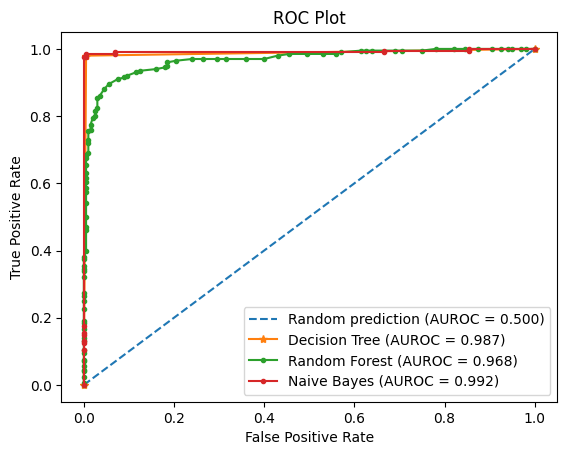

In [30]:
import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(dt_fpr, dt_tpr, marker='*', label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()